# Case Study: Handwriting Recognition
Kita akan menggunakan data gambar 8x8 pixel tulisan tangan hitam putih angka 0,1,2,3,4,5,6,7,8,9 sebagai raw data.

Kita mencoba menebak gambarnya sedang memperlihatkan angka berapa.

Model Machine Learning yang akan kita buat untuk membuat prediksi tersebut bertipe Supervised, Classification, dan menggunakan algoritma Logistic Regression.

In [1]:
# import package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# scaling data
from sklearn.preprocessing import StandardScaler

In [2]:
# import data
from sklearn.datasets import load_digits

X, y =load_digits(return_X_y=True)

df = pd.DataFrame(X)
display(df.head())

print(y[:5])

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


[0 1 2 3 4]


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 64 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1797 non-null   float64
 1   1       1797 non-null   float64
 2   2       1797 non-null   float64
 3   3       1797 non-null   float64
 4   4       1797 non-null   float64
 5   5       1797 non-null   float64
 6   6       1797 non-null   float64
 7   7       1797 non-null   float64
 8   8       1797 non-null   float64
 9   9       1797 non-null   float64
 10  10      1797 non-null   float64
 11  11      1797 non-null   float64
 12  12      1797 non-null   float64
 13  13      1797 non-null   float64
 14  14      1797 non-null   float64
 15  15      1797 non-null   float64
 16  16      1797 non-null   float64
 17  17      1797 non-null   float64
 18  18      1797 non-null   float64
 19  19      1797 non-null   float64
 20  20      1797 non-null   float64
 21  21      1797 non-null   float64
 22  

In [4]:
X.shape

(1797, 64)

In [5]:
X[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

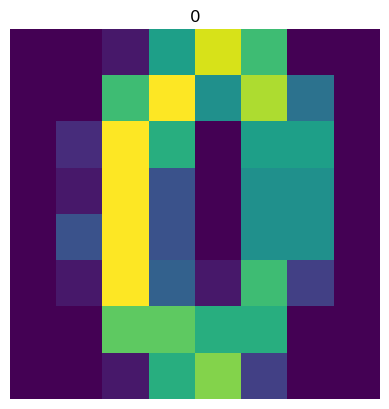

In [6]:
# optional: karena data kita gambar, disini dibuat visualnya
n = 10 # index data ke berapa, data kita ada 1797 gambar berbeda, dalam bentuk numpy array

digit = X[n].reshape((8,8)) # dibentuk jadi gambar 8 x 8
plt.imshow(digit) # ditampilkan sebagai gambar

plt.title(y[n]) # targetnya, aslinya gambar ini angka berapa

plt.axis("off") # hapus axis
plt.show()

In [7]:
# scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled[0]

array([ 0.        , -0.33501649, -0.04308102,  0.27407152, -0.66447751,
       -0.84412939, -0.40972392, -0.12502292, -0.05907756, -0.62400926,
        0.4829745 ,  0.75962245, -0.05842586,  1.12772113,  0.87958306,
       -0.13043338, -0.04462507,  0.11144272,  0.89588044, -0.86066632,
       -1.14964846,  0.51547187,  1.90596347, -0.11422184, -0.03337973,
        0.48648928,  0.46988512, -1.49990136, -1.61406277,  0.07639777,
        1.54181413, -0.04723238,  0.        ,  0.76465553,  0.05263019,
       -1.44763006, -1.73666443,  0.04361588,  1.43955804,  0.        ,
       -0.06134367,  0.8105536 ,  0.63011714, -1.12245711, -1.06623158,
        0.66096475,  0.81845076, -0.08874162, -0.03543326,  0.74211893,
        1.15065212, -0.86867056,  0.11012973,  0.53761116, -0.75743581,
       -0.20978513, -0.02359646, -0.29908135,  0.08671869,  0.20829258,
       -0.36677122, -1.14664746, -0.5056698 , -0.19600752])

In [8]:
# split jadi training dan testing data

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y)

In [9]:
# buat dan latih model
model = LogisticRegression()
model.fit(X_train, y_train)

c:\Users\stefa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

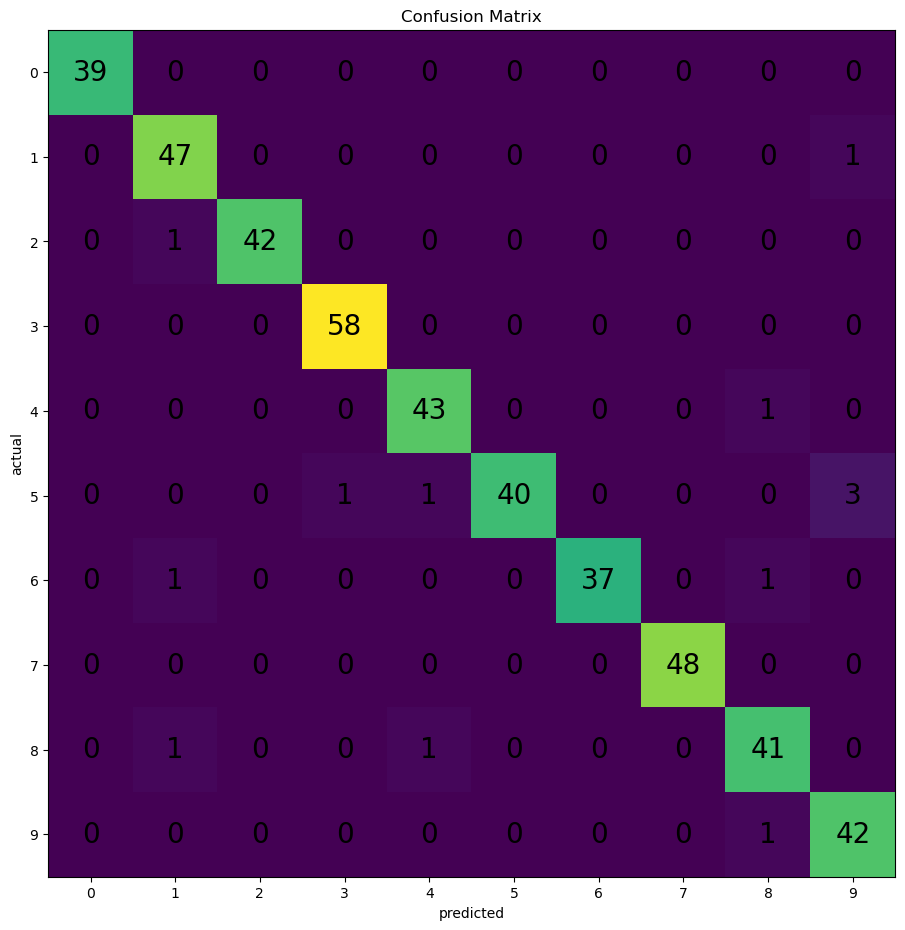

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       0.94      0.98      0.96        48
           2       1.00      0.98      0.99        43
           3       0.98      1.00      0.99        58
           4       0.96      0.98      0.97        44
           5       1.00      0.89      0.94        45
           6       1.00      0.95      0.97        39
           7       1.00      1.00      1.00        48
           8       0.93      0.95      0.94        43
           9       0.91      0.98      0.94        43

    accuracy                           0.97       450
   macro avg       0.97      0.97      0.97       450
weighted avg       0.97      0.97      0.97       450



In [10]:
# evaluasi

def visualizeCM(cm):
    n = len(cm) # jumlah label/ kategori

    fig, ax = plt.subplots(figsize=(n+1, n+1))
    ax.imshow(cm)
    ax.grid(False)
    ax.xaxis.set(ticks=range(n))
    ax.set_xlabel("predicted")
    ax.yaxis.set(ticks=range(n))
    ax.set_ylabel("actual")
    ax.set_ylim( n - 0.5, -0.5)
    for i in range(n):
        for j in range(n):
            ax.text(j, i, cm[i, j], ha='center', va='center', color='black', fontsize = 20)
    plt.title("Confusion Matrix")
    plt.show()

y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
visualizeCM(cm)

print(classification_report(y_test, y_pred))